本文主要考虑使用python中常用的工具matplotlib，绘制一些金融中常用的2D和3D图像。
see https://www.cnblogs.com/zhizhan/p/5615947.html

In [97]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

* 2D例1

In [4]:
np.random.seed(1000)
y=np.random.standard_normal(20)#准备绘图数据，我们来生成20个标准正态分布的伪随机数

In [5]:
y

array([-0.8044583 ,  0.32093155, -0.02548288,  0.64432383, -0.30079667,
        0.38947455, -0.1074373 , -0.47998308,  0.5950355 , -0.46466753,
        0.66728131, -0.80611561, -1.19606983, -0.40596016, -0.18237734,
        0.10319289, -0.13842199,  0.70569237,  1.27179528, -0.98674733])

pyplot子库中的plot函数，原则上说，它需要两组数据：
* x值：一个列表包含X轴的数据
* y值：一个列表包含Y轴的数据
* x值和y值的数量必须匹配。

In [6]:
x=range(len(y))
x

range(0, 20)

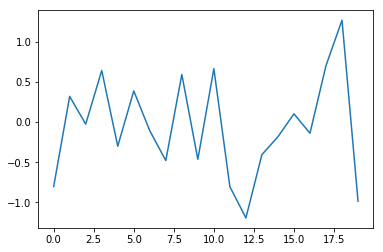

In [7]:
plt.plot(x,y)

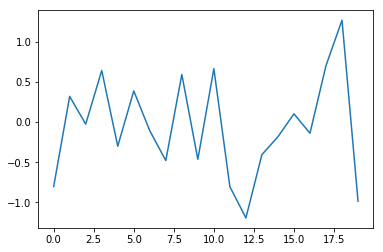

In [9]:
plt.plot(y)#如果在函数中只提供y值，plot函数会取对应的索引值作为x

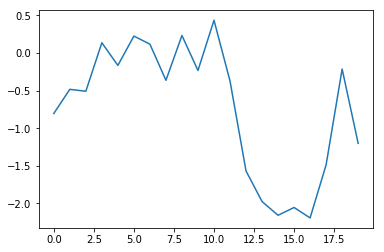

In [11]:
plt.plot(y.cumsum())#大多数的ndarray方法返回的仍然是ndarray对象，因此可以将这个对象传递给另一个方法

(-0.95000000000000007,
 19.949999999999999,
 -2.3228186637490449,
 0.56550858086558653)

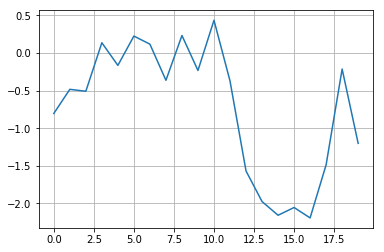

In [12]:
plt.plot(y.cumsum())
plt.grid(True)#增加网格线
plt.axis('tight')#设置坐标轴的范围为数据的范围

(-3.1915310617211072, 1.4342209788376488)

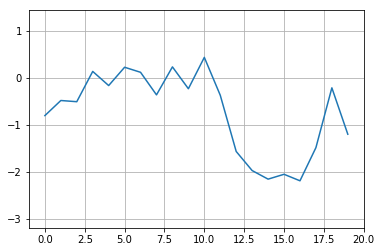

In [13]:
plt.plot(y.cumsum())
plt.grid(True)
plt.xlim(-1,20)#x轴范围
plt.ylim(np.min(y.cumsum())-1,np.max(y.cumsum())+1)#y轴范围

Text(0.5,1,'A Simplot plot')

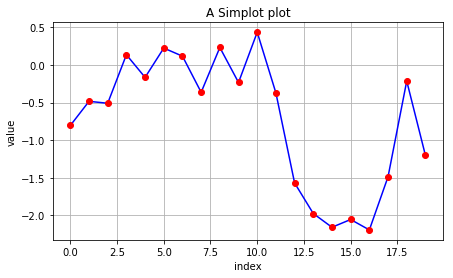

In [14]:
plt.figure(figsize=(7,4))#图的大小
plt.plot(y.cumsum(),'b',lw=1.5)#y是blue,linewidth=1.5
plt.plot(y.cumsum(),'ro')#红色圆点
plt.grid(True)
plt.axis('tight')#设置坐标轴的范围为数据的范围
plt.xlabel('index')#x轴名称
plt.ylabel('value')#y轴名称
plt.title('A Simplot plot')#图像名称

* 2D例2

In [15]:
np.random.seed(2000)
y=np.random.standard_normal((20,2)).cumsum(axis=0)
y

array([[ 1.73673761,  1.89791391],
       [-0.37003581,  1.74900181],
       [ 0.21302575, -0.51023122],
       [ 0.35026529, -1.21144444],
       [-0.27051479, -1.6910642 ],
       [ 0.93922398, -2.76624806],
       [ 1.74614319, -3.05703153],
       [ 1.52519555, -3.22618757],
       [ 2.62602999, -3.14367705],
       [ 2.6216544 , -4.8662353 ],
       [ 3.67921082, -7.38414811],
       [ 1.7685707 , -6.07769276],
       [ 2.19296834, -6.54686084],
       [ 1.18689581, -7.46878388],
       [ 1.81330034, -7.11160718],
       [ 1.79458178, -6.89043591],
       [ 2.49318589, -6.05592589],
       [ 0.82754806, -8.95736573],
       [ 0.77890953, -9.00274406],
       [ 2.25424343, -9.51643749]])

Text(0.5,1,'A Simple Plot')

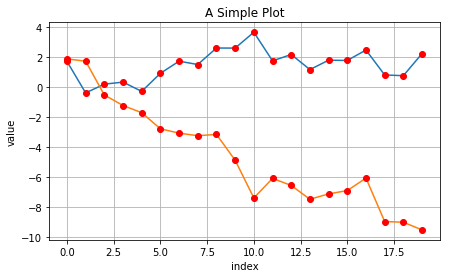

In [16]:
plt.figure(figsize=(7,4))
plt.plot(y,lw=1.5)
plt.plot(y,'ro')
plt.grid(True)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')
#两列结果的线性展现

Text(0.5,1,'A Simple Plot')

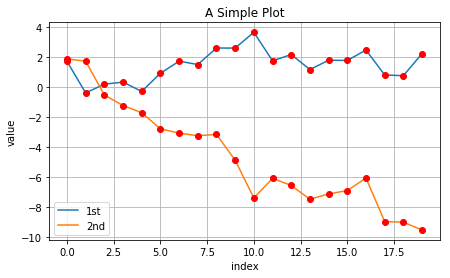

In [17]:
plt.figure(figsize=(7,4))
plt.plot(y[:,0],lw=1.5,label='1st')#第一列label 1st
plt.plot(y[:,1],lw=1.5,label='2nd')#第二列label 2nd
plt.plot(y,'ro')
plt.grid(True)
plt.legend(loc=0)#图例，loc=0表示自动决定图例的最佳位置
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')

很多时候不同的数据集可能使用着不同的单位，这样使用单一的y轴可能产生视觉上的偏差。有两种方法可以用于解决这个问题：
* 使用两个Y轴（分别在左/右）
* 使用两个子图（上/下或左/右）

Text(0.5,1,'A Simplot plot')

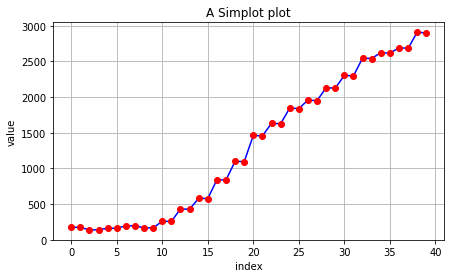

In [18]:
y[:,0]=y[:,0]*100#构造不同单位的数据集
plt.figure(figsize=(7,4))
plt.plot(y.cumsum(),'b',lw=1.5)
plt.plot(y.cumsum(),'ro')
plt.grid(True)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simplot plot')

Text(0.5,1,'A Simple Plot')

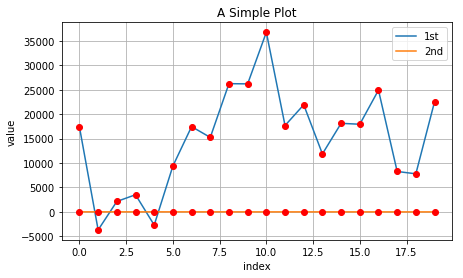

In [19]:
y[:,0]=y[:,0]*100
plt.figure(figsize=(7,4))
plt.plot(y[:,0],lw=1.5,label='1st')
plt.plot(y[:,1],lw=1.5,label='2nd')
plt.plot(y,'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')
#视觉上的偏差

Text(0,0.5,'value 2nd')

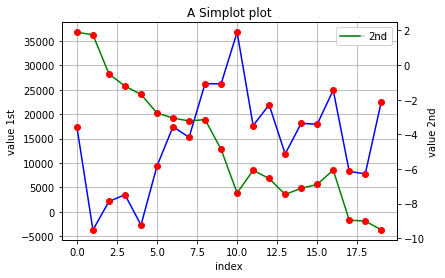

In [22]:
#绘制子图：plt.subplot使用三个数（numrows，numcols和fignum）来确定每一个子图的位置，子图的位置因此就是从1开始到numrows*numcols
fig,ax1=plt.subplots()#返回一个 Figure实例fig 和一个 AxesSubplot实例ax 。这个很好理解，fig代表整个图像，ax代表坐标轴和画的图。 
#说明ax是保存 AxesSubplot实例 的 ndarray数组。 
plt.plot(y[:,0],'b',lw=1.5,label='1st')
plt.plot(y[:,0],'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simplot plot')
ax2=ax1.twinx()#制作一个兄弟轴
plt.plot(y[:,1],'g',lw=1.5,label='2nd')
plt.plot(y[:,1],'ro')
plt.legend(loc=0)
plt.ylabel('value 2nd')

Text(0,0.5,'value 2nd')

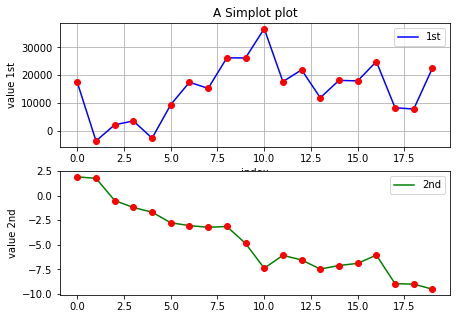

In [23]:
plt.figure(figsize=(7,5))
plt.subplot(211)#numRows, numCols, plotNum
plt.plot(y[:,0],'b',lw=1.5,label='1st')
plt.plot(y[:,0],'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simplot plot')
plt.subplot(212)
plt.plot(y[:,1],'g',lw=1.5,label='2nd')
plt.plot(y[:,1],'ro')
plt.legend(loc=0)
plt.ylabel('value 2nd')

Text(0.5,1,'2nd Data Set')

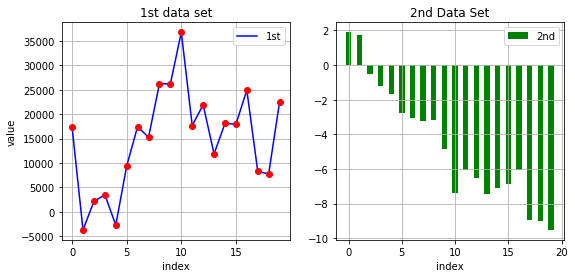

In [24]:
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.plot(y[:,0],'b',lw=1.5,label='1st')
plt.plot(y[:,0],'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('1st data set')
plt.subplot(122)
plt.bar(np.arange(len(y)),y[:,1],width=0.5,color='g',label='2nd')#bar plot,20个数据，每个数据都是bar
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.title('2nd Data Set')

* 2D绘图其他实例

In [26]:
y=np.random.standard_normal((1000,2))

Text(0.5,1,'Scatter Plot')

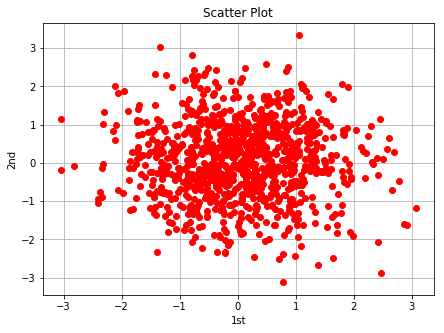

In [28]:
plt.figure(figsize=(7,5))
plt.plot(y[:,0],y[:,1],'ro')#第一列x轴，第二列y轴
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

Text(0.5,1,'Scatter Plot')

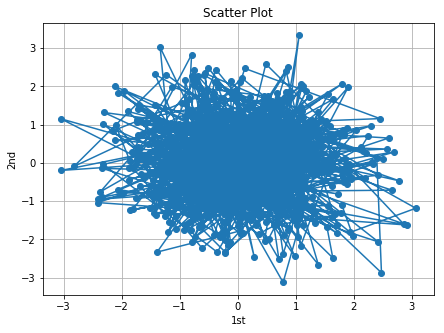

In [30]:
plt.figure(figsize=(7,5))
plt.plot(y[:,0],y[:,1],marker='o')#点连成线
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

* 3D绘图举例

In [31]:
c=np.random.randint(0,10,len(y))
c

array([9, 9, 7, 5, 0, 1, 6, 2, 7, 6, 6, 2, 2, 7, 1, 2, 3, 7, 9, 5, 5, 7, 8,
       2, 2, 9, 1, 9, 9, 3, 3, 6, 1, 1, 6, 5, 0, 2, 7, 1, 5, 8, 9, 3, 4, 6,
       4, 9, 7, 6, 4, 0, 3, 1, 8, 5, 6, 2, 7, 4, 6, 9, 4, 1, 7, 0, 7, 3, 3,
       4, 9, 6, 0, 4, 1, 7, 7, 1, 5, 5, 0, 9, 2, 3, 2, 3, 7, 6, 8, 8, 9, 0,
       0, 9, 8, 0, 8, 1, 7, 5, 2, 6, 4, 2, 5, 7, 2, 8, 6, 2, 6, 6, 0, 1, 4,
       8, 2, 9, 7, 3, 1, 9, 7, 5, 6, 4, 5, 4, 7, 2, 1, 3, 2, 7, 2, 9, 2, 7,
       6, 7, 9, 9, 0, 8, 1, 5, 1, 3, 8, 5, 7, 3, 2, 4, 0, 6, 6, 0, 0, 8, 1,
       4, 1, 4, 0, 8, 1, 2, 4, 4, 5, 5, 6, 3, 1, 5, 5, 1, 0, 7, 7, 0, 8, 6,
       5, 5, 3, 7, 2, 3, 7, 1, 7, 0, 8, 1, 2, 4, 8, 1, 6, 5, 6, 9, 7, 7, 3,
       7, 8, 3, 9, 8, 3, 5, 2, 4, 2, 3, 6, 5, 4, 3, 8, 7, 1, 0, 3, 3, 7, 3,
       0, 9, 4, 0, 0, 6, 3, 7, 4, 8, 2, 6, 5, 5, 4, 2, 6, 5, 3, 4, 2, 9, 0,
       3, 5, 1, 5, 5, 7, 6, 7, 5, 1, 3, 2, 6, 2, 9, 8, 6, 9, 2, 5, 1, 2, 7,
       8, 2, 6, 2, 5, 9, 4, 8, 2, 8, 7, 2, 7, 1, 7, 9, 1, 8, 8, 8, 5, 0, 7,
       9, 0,

Text(0.5,1,'Scatter Plot')

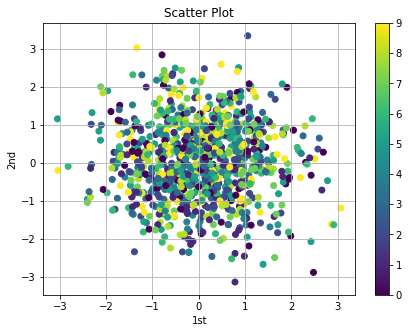

In [39]:
plt.figure(figsize=(7,5))
plt.scatter(y[:,0],y[:,1],c=c,marker='o')#3D需要单独的scatter函数
plt.colorbar()#表现的是c的数值，类似于密度
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

* histogram

Text(0.5,1,'Histogram')

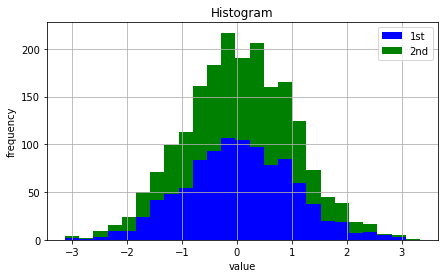

In [42]:
plt.figure(figsize=(7,4))
plt.hist(y,label=['1st','2nd'],color=['b','g'],stacked=True,bins=25)#stacked在1st上累计2nd
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')

* boxplot

Text(0.5,1,'boxplot')

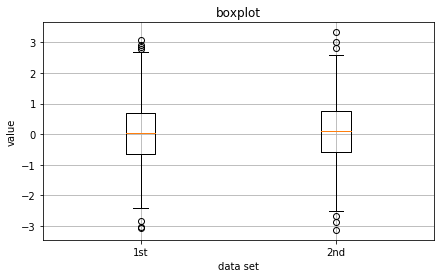

In [43]:
fig,ax=plt.subplots(figsize=(7,4))
plt.boxplot(y)
plt.grid(True)
plt.setp(ax,xticklabels=['1st','2nd'])#使用pyplot.setp()方法(set properties),可以设置（一组）图形对象实例的属性
#tick表示刻度线
plt.xlabel('data set')
plt.ylabel('value')
plt.title('boxplot')

[None, None]

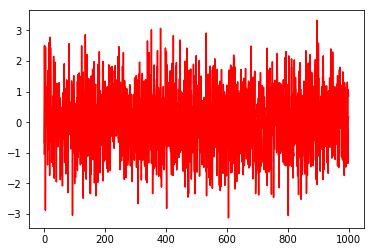

In [48]:
line=plt.plot(y,'r')
plt.setp(line,linestyle='-')

* 定积分作图

In [49]:
def func(x):#定义被积函数
    return 0.5*np.exp(x)+1

In [50]:
a,b=0.5,1.5
x=np.linspace(0,2)#x轴是0，2之间的均匀分布的数
y=func(x)

In [51]:
x

array([ 0.        ,  0.04081633,  0.08163265,  0.12244898,  0.16326531,
        0.20408163,  0.24489796,  0.28571429,  0.32653061,  0.36734694,
        0.40816327,  0.44897959,  0.48979592,  0.53061224,  0.57142857,
        0.6122449 ,  0.65306122,  0.69387755,  0.73469388,  0.7755102 ,
        0.81632653,  0.85714286,  0.89795918,  0.93877551,  0.97959184,
        1.02040816,  1.06122449,  1.10204082,  1.14285714,  1.18367347,
        1.2244898 ,  1.26530612,  1.30612245,  1.34693878,  1.3877551 ,
        1.42857143,  1.46938776,  1.51020408,  1.55102041,  1.59183673,
        1.63265306,  1.67346939,  1.71428571,  1.75510204,  1.79591837,
        1.83673469,  1.87755102,  1.91836735,  1.95918367,  2.        ])

In [52]:
y

array([ 1.5       ,  1.52083038,  1.54252857,  1.56513073,  1.5886745 ,
        1.61319913,  1.63874548,  1.6653561 ,  1.69307534,  1.72194939,
        1.75202635,  1.78335634,  1.81599156,  1.84998639,  1.88539748,
        1.92228381,  1.96070686,  2.00073064,  2.04242184,  2.08584993,
        2.13108726,  2.17820922,  2.22729432,  2.27842433,  2.33168447,
        2.38716346,  2.44495374,  2.50515162,  2.56785738,  2.63317552,
        2.70121485,  2.77208876,  2.84591533,  2.92281757,  3.00292362,
        3.08636694,  3.17328658,  3.26382736,  3.35814013,  3.45638205,
        3.55871679,  3.66531489,  3.77635394,  3.89201896,  4.01250268,
        4.13800583,  4.26873755,  4.40491565,  4.54676703,  4.69452805])

(0, 4.8542544519385915)

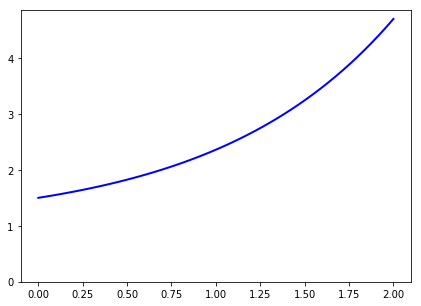

In [54]:
fig,ax=plt.subplots(figsize=(7,5))
plt.plot(x,y,'b',linewidth=2)
plt.ylim(ymin=0)#函数图像

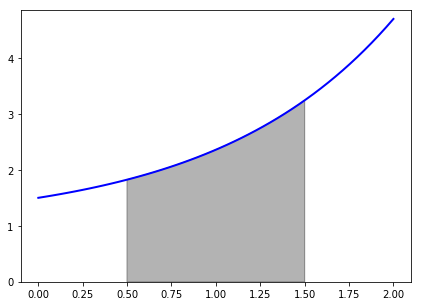

In [64]:
from matplotlib.patches import Polygon
fig,ax=plt.subplots(figsize=(7,5))
plt.plot(x,y,'b',linewidth=2)
plt.ylim(ymin=0)#函数图像
Ix=np.linspace(a,b)#x的list
Iy=func(Ix)#y的list
verts=[(a,0)]+list(zip(Ix,Iy))+[(b,0)]#生成一个类似于(x,y)的list
poly=Polygon(verts,facecolor='0.7',edgecolor='0.5')#facecolor里面的颜色，edgecolor边缘的颜色
ax.add_patch(poly)#生成阴影的积分区域

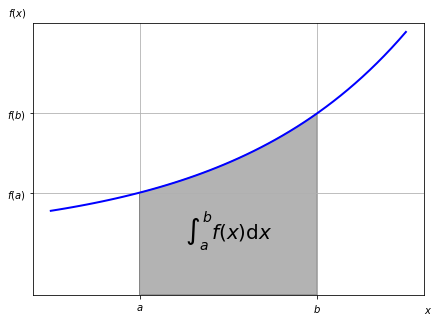

In [69]:
#把数学公式和相关的文字说明加入到图形中
fig,ax=plt.subplots(figsize=(7,5))
a,b=0.5,1.5
plt.plot(x,y,'b',linewidth=2)
plt.ylim(ymin=0)#函数图像
Ix=np.linspace(a,b)#x的list
Iy=func(Ix)#y的list
verts=[(a,0)]+list(zip(Ix,Iy))+[(b,0)]#生成一个类似于(x,y)的list
poly=Polygon(verts,facecolor='0.7',edgecolor='0.5')#facecolor里面的颜色，edgecolor边缘的颜色
ax.add_patch(poly)#生成阴影的积分区域
plt.text(0.5*(a+b),1,r"$\int_a^b f(x)\mathrm{d}x$",horizontalalignment='center',fontsize=20)#积分符号,第一个参数表示位置
plt.figtext(0.9,0.075,'$x$')
plt.figtext(0.075,0.9,'$f(x)$')
ax.set_xticks((a,b))#位置
ax.set_xticklabels(('$a$','$b$'))
ax.set_yticks([func(a),func(b)])#位置
ax.set_yticklabels(('$f(a)$','$f(b)$'))
plt.grid(True)

* 3D作图

3D作图在金融中一个常见的用途是绘制隐含波动率的曲面。这里我们假设一个假想的波动率曲面，基于假设的若干个期权执行价格和到期期限。

In [99]:
strike=np.linspace(50,150,24)#执行价格
ttm=np.linspace(0.5,2.5,24)#到期期限time to maturity
strike,ttm=np.meshgrid(strike,ttm)#生成一个坐标平面

In [100]:
iv=(strike-100)**2/(100*strike)/ttm#假想的隐含波动率(随便瞎写的），实际上需要由牛顿法估计计算

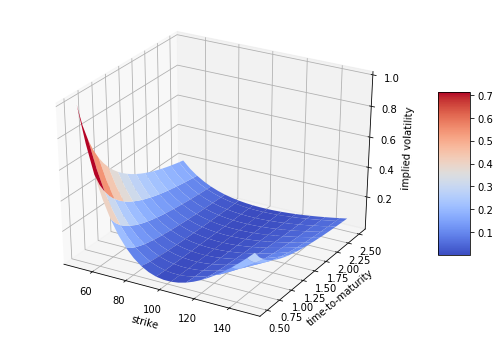

In [101]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(9,6))
ax=fig.gca(projection='3d')#调用gca()获取当前的axes绘图区域，坐标轴
surf=ax.plot_surface(strike,ttm,iv,rstride=2,cstride=2,cmap=plt.cm.coolwarm,linewidth=0.5,antialiased=True)
#绘图的面，rstride和cstride是图的转动角度，cmap是大小和冷热颜色对应，
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf,shrink=0.5,aspect=5)#设置右侧的colorbar

Text(0.5,0,'implied volatility')

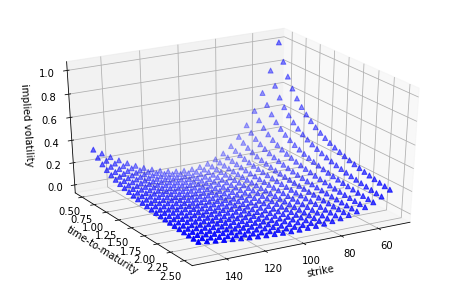

In [103]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111,projection='3d')
ax.view_init(30,60)#使用view_init函数可以设置3D图形的视角
ax.scatter(strike,ttm,iv,zdir='z',s=25,c='b',marker='^')#规定z轴
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')